# First implementation of Nearest Neighbours

## Import statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Collect Data
### And select subsets for test and train

In [10]:
my_data = np.genfromtxt('../ML/mnist_test.csv', delimiter=',')
train = my_data[0:999]
test = my_data[1000:1100]

## Functions from previous notebooks
*Reference Find Distance and Print Numberfor further explanation*

In [8]:
#This one is slightly twaked to accept the char instead of looking for it in the array
def getCharacter(char, side=28):
    size = side * side
    nm = char[0]
    pxs = np.zeros(size)
    for i in range(1, size + 1):
        pxs[i-1] = char[i]
    pxs = np.reshape(pxs, (side, side))
    pxs = np.fliplr([pxs])[0]
    
    return nm, pxs

def plotCharacter(pxs):
    side = pxs.shape[0]
    y = x = range(1, side + 1)
    x, y = np.meshgrid(x, y)
    plt.pcolormesh(x, y, pxs, cmap=plt.cm.get_cmap('Greys'))
    plt.colorbar()
    plt.show()
    
def findDistance(pxs1, pxs2, square=False):
    if square:
        return np.sum(np.square(pxs1 - pxs2))
    else:
        return np.sum(np.absolute(pxs1 - pxs2))

## Function for finding the character with the least distance

In [27]:
def nearestNeighbour( train, pxs ):
    #Give a default value to minDif to then compare and minimize
    _, iniChar = getCharacter(train[0])
    nearest = train[0]
    minDif = findDistance(iniChar, pxs)
    #Iterate over the other chars to check which is the single best
    for char in train:
        _, pxs2 = getCharacter(char)
        dif = findDistance(pxs2, pxs)        
        if dif < minDif:
            minDif = dif
            nearest = char
            
    return nearest

## Test Function

### Try with a 9

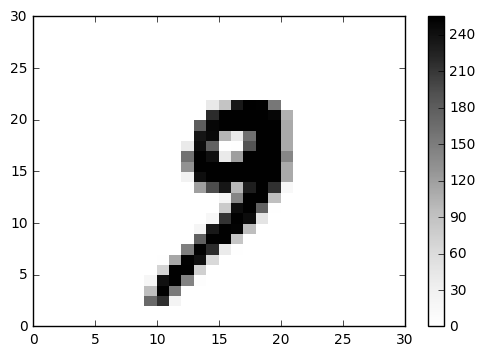

In [22]:
nm, pxs = getCharacter(test[0])
plotCharacter(pxs)

In [28]:
nearest = nearestNeighbour(train, pxs)
value, _ = getCharacter(nearest)
print(value)

9.0


### Try with a 2

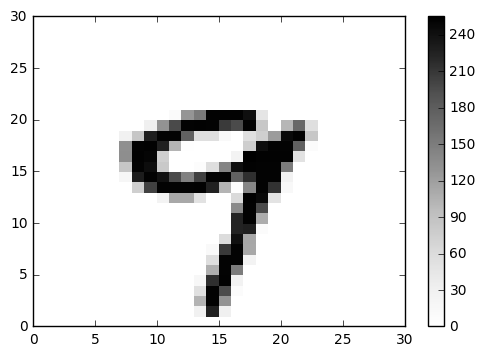

In [40]:
nm, pxs = getCharacter(test[88])
plotCharacter(pxs)

In [42]:
nearest = nearestNeighbour(train, pxs)
value, _ = getCharacter(nearest)
print(value)

9.0
